DataSet 1 - /kaggle/input/chest-xray-pneumonia

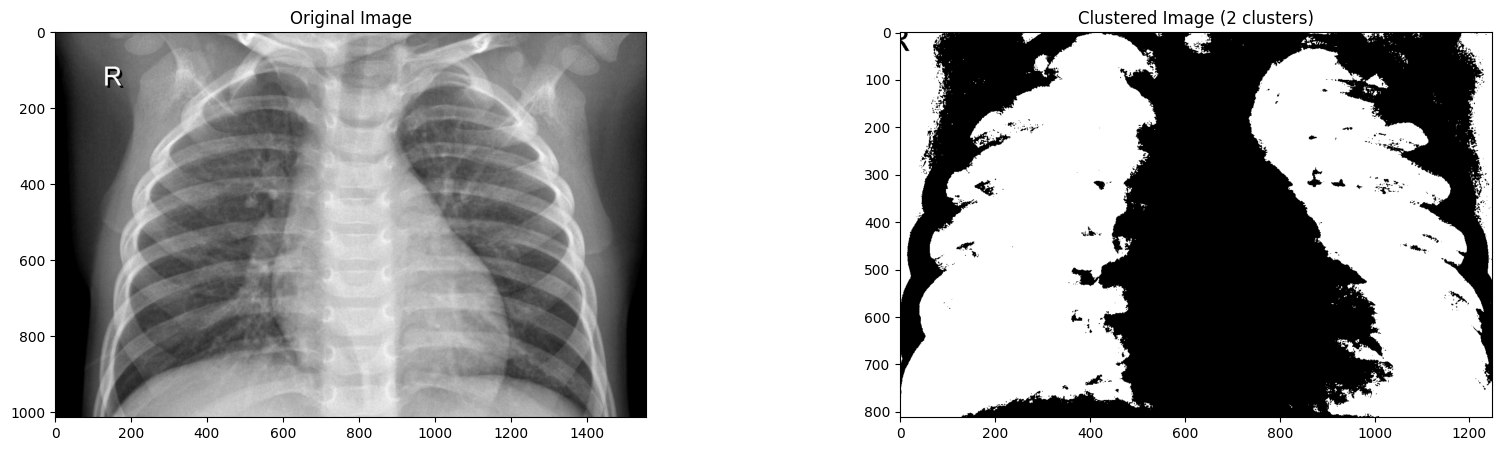

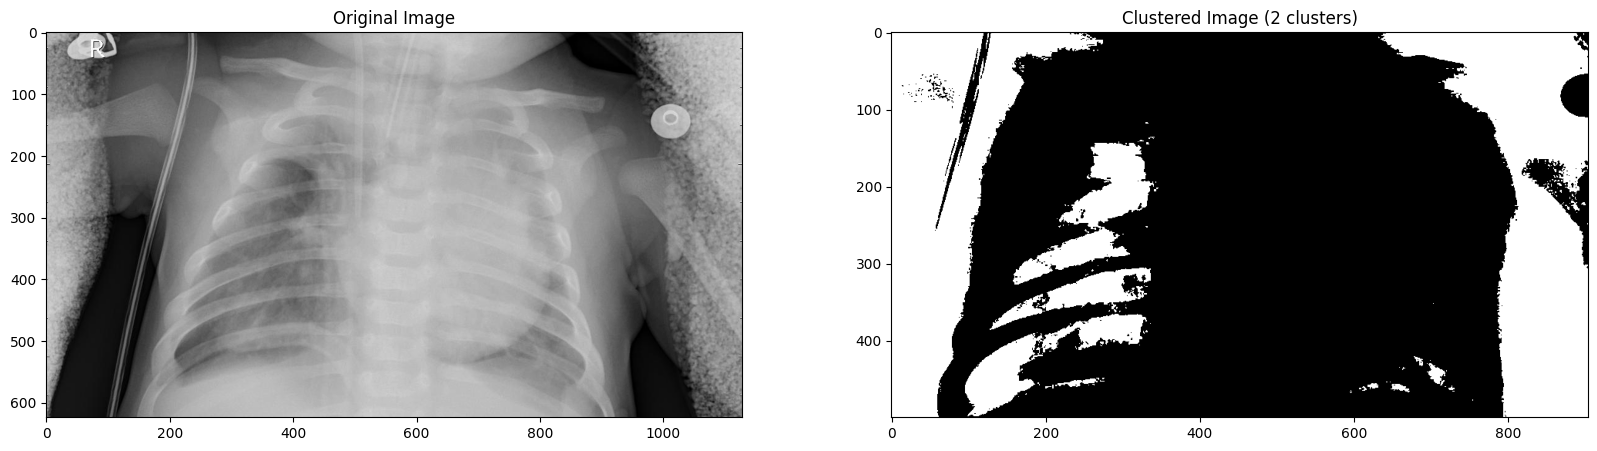

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def crop(image_path, margin_percent=10):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    margin_x = int(w * margin_percent / 100)
    margin_y = int(h * margin_percent / 100)
    cropped = img[margin_y:h-margin_y, margin_x:w-margin_x]
    return cropped, img

def process(img):
    flat_img = img.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    labels = kmeans.fit_predict(flat_img)
    centers = kmeans.cluster_centers_
    if np.mean(centers[1]) > np.mean(centers[0]):
        labels = 1 - labels
    clustered = np.reshape(labels, img.shape)
    return clustered

def plot(original, clustered):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('on')
    plt.subplot(1, 2, 2)
    plt.imshow(clustered, cmap='gray')
    plt.title('Clustered Image (2 clusters)')
    plt.axis('on')
    plt.show()

image_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0085-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"
]

for image_path in image_paths:
    cropped_img, original_img = crop(image_path)
    clustered_img = process(cropped_img)
    plot(original_img, clustered_img)

DataSet 2 - 

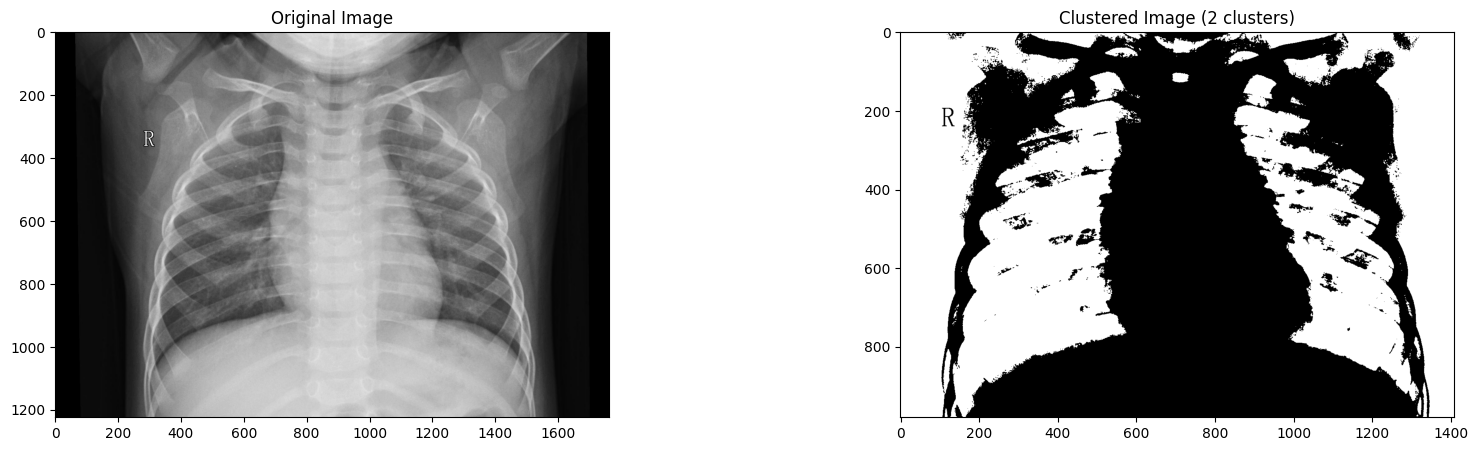

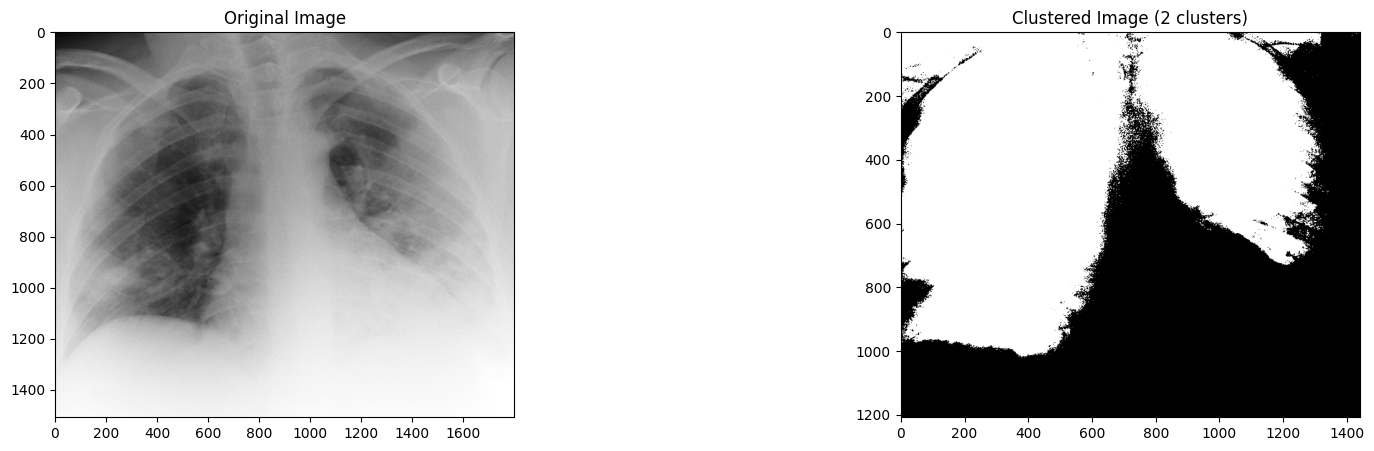

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def crop(image_path, margin_percent=10):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    margin_x = int(w * margin_percent / 100)
    margin_y = int(h * margin_percent / 100)
    cropped = img[margin_y:h-margin_y, margin_x:w-margin_x]
    return cropped, img

def process(img):
    flat_img = img.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    labels = kmeans.fit_predict(flat_img)
    centers = kmeans.cluster_centers_
    if np.mean(centers[1]) > np.mean(centers[0]):
        labels = 1 - labels
    clustered = np.reshape(labels, img.shape)
    return clustered

def plot(original, clustered):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('on')
    plt.subplot(1, 2, 2)
    plt.imshow(clustered, cmap='gray')
    plt.title('Clustered Image (2 clusters)')
    plt.axis('on')
    plt.show()

image_paths = [
    "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg",
    "/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg"
]

for image_path in image_paths:
    cropped_img, original_img = crop(image_path)
    clustered_img = process(cropped_img)
    plot(original_img, clustered_img)
    


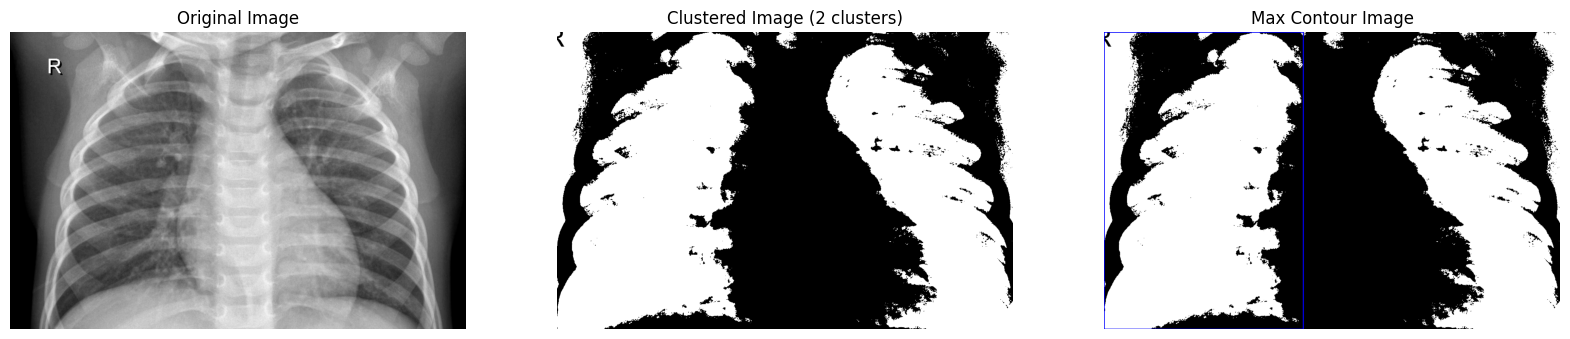

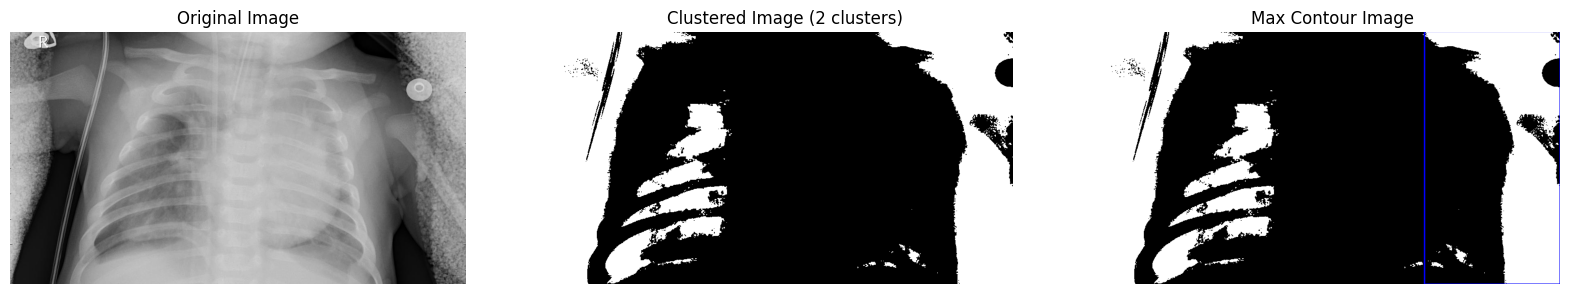

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def process(img):
    flat_img = img.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    labels = kmeans.fit_predict(flat_img)
    centers = kmeans.cluster_centers_
    if np.mean(centers[1]) > np.mean(centers[0]):
        labels = 1 - labels
    clustered = np.reshape(labels, img.shape)
    # Convert to binary image
    clustered_binary = np.uint8(clustered * 255)
    return clustered_binary

def draw_max_contour(clustered_img):
    bgr_img = cv2.cvtColor(clustered_img, cv2.COLOR_GRAY2BGR)
    result = bgr_img.copy()
    ret, thresh = cv2.threshold(clustered_img, 0, 255, cv2.THRESH_BINARY)
    if cv2.__version__[0] > '3':
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        _, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    thickness = 10
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
    return result

def plot(original, clustered, max_contour_image):
    plt.figure(figsize=(20, 5))
    
    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot the clustered image
    plt.subplot(1, 3, 2)
    plt.imshow(clustered, cmap='gray')
    plt.title('Clustered Image (2 clusters)')
    plt.axis('off')
    
    # Plot the max contour image
    plt.subplot(1, 3, 3)
    plt.imshow(max_contour_image, cmap='gray')
    plt.title('Max Contour Image')
    plt.axis('off')
    
    plt.show()

image_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0085-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"
]

for image_path in image_paths:
    cropped_img, original_img = crop(image_path)
    clustered_img = process(cropped_img)
    max_contour_image = draw_max_contour(clustered_img)
    plot(original_img, clustered_img, max_contour_image)

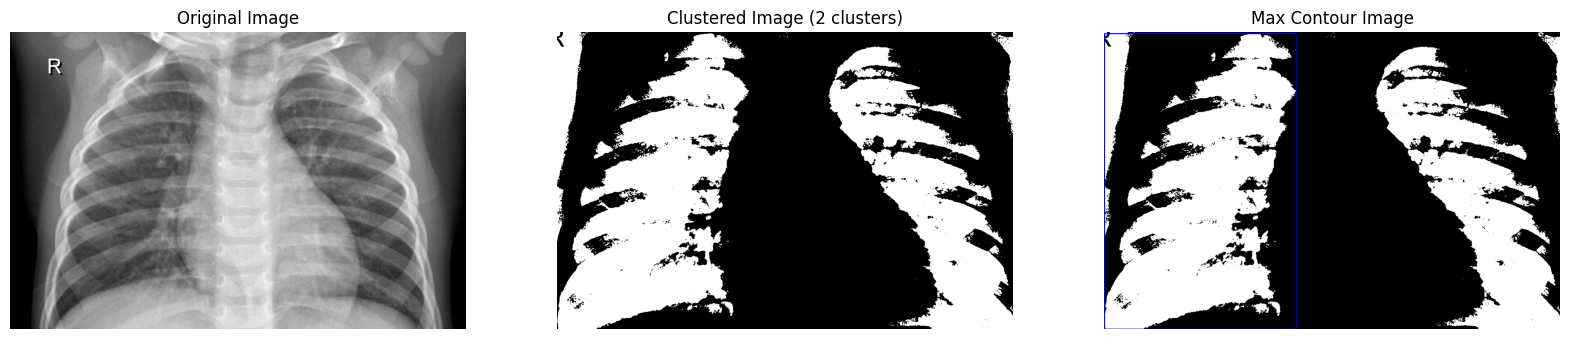

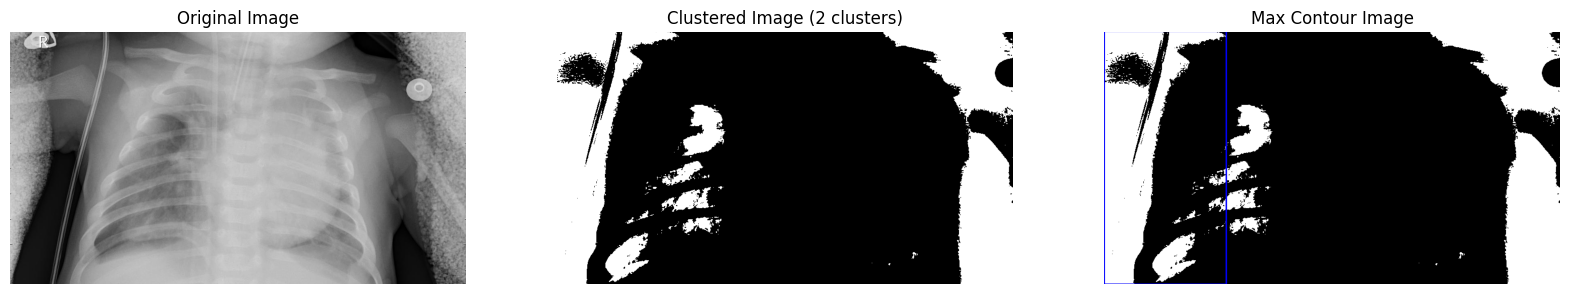

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def process(img):
    flat_img = img.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    labels = kmeans.fit_predict(flat_img)
    centers = kmeans.cluster_centers_
    if np.mean(centers[1]) > np.mean(centers[0]):
        labels = 1 - labels
    clustered = np.reshape(labels, img.shape)
    # Convert to binary image
    clustered_binary = np.uint8(clustered * 255)
    return clustered_binary

def crop_with_margin(img, margin_percentage=10):
    height, width = img.shape[:2]
    margin_x = int(width * margin_percentage / 100)
    margin_y = int(height * margin_percentage / 100)
    return img[margin_y:height-margin_y, margin_x:width-margin_x]

def draw_max_contour(clustered_img):
    bgr_img = cv2.cvtColor(clustered_img, cv2.COLOR_GRAY2BGR)
    result = bgr_img.copy()
    ret, thresh = cv2.threshold(clustered_img, 0, 255, cv2.THRESH_BINARY)
    if cv2.__version__[0] > '3':
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        _, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    thickness = 10
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
    return result

def plot(original, clustered, max_contour_image):
    plt.figure(figsize=(20, 5))
    
    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot the clustered image
    plt.subplot(1, 3, 2)
    plt.imshow(clustered, cmap='gray')
    plt.title('Clustered Image (2 clusters)')
    plt.axis('off')
    
    # Plot the max contour image
    plt.subplot(1, 3, 3)
    plt.imshow(max_contour_image, cmap='gray')
    plt.title('Max Contour Image')
    plt.axis('off')
    
    plt.show()

image_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0085-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"
]

for image_path in image_paths:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    clustered_img = process(img)
    clustered_img_with_margin = crop_with_margin(clustered_img)
    max_contour_image = draw_max_contour(clustered_img_with_margin)
    plot(img, clustered_img_with_margin, max_contour_image)


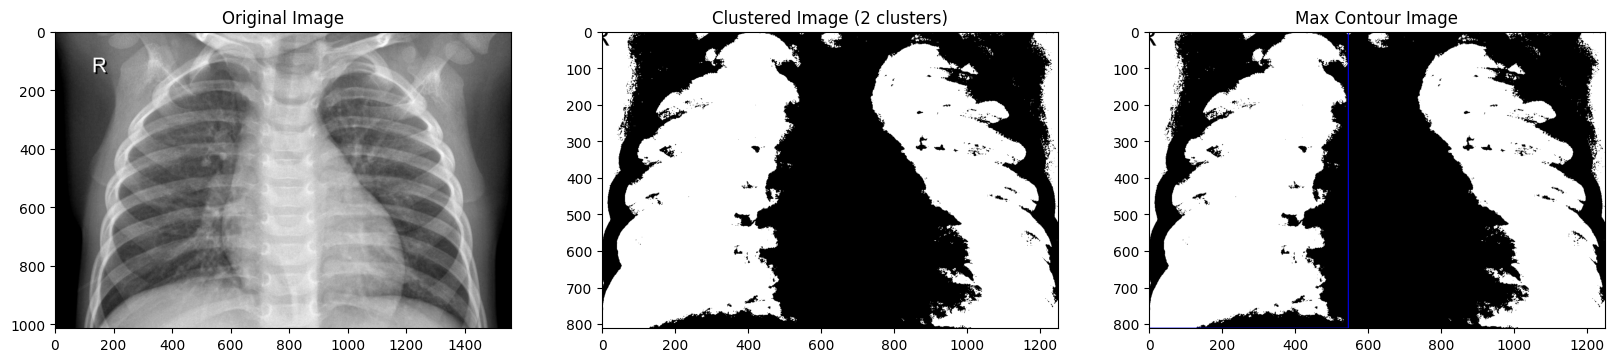

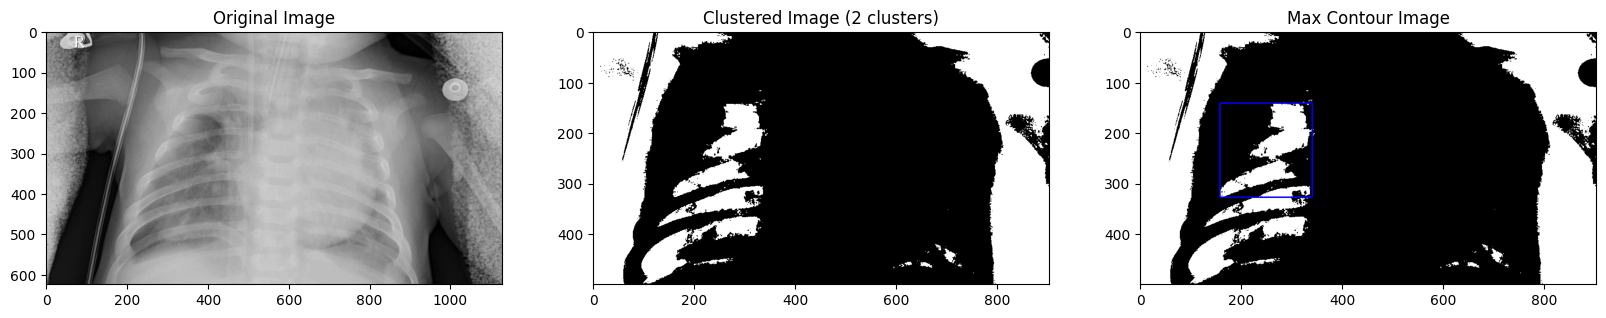

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def process(img):
    flat_img = img.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    labels = kmeans.fit_predict(flat_img)
    centers = kmeans.cluster_centers_
    if np.mean(centers[1]) > np.mean(centers[0]):
        labels = 1 - labels
    clustered = np.reshape(labels, img.shape)
    # Convert to binary image
    clustered_binary = np.uint8(clustered * 255)
    return clustered_binary

def draw_max_contour(clustered_img):
    bgr_img = cv2.cvtColor(clustered_img, cv2.COLOR_GRAY2BGR)
    result = bgr_img.copy()
    ret, thresh = cv2.threshold(clustered_img, 0, 255, cv2.THRESH_BINARY)
    if cv2.__version__[0] > '3':
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        _, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    middle_x = clustered_img.shape[1] // 2
    region_start = middle_x - clustered_img.shape[1] * 0.15
    region_end = middle_x + clustered_img.shape[1] * 0.15
    
    max_contour_area = 0
    max_contour = None
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if region_start <= x <= region_end or region_start <= x + w <= region_end:
            contour_area = cv2.contourArea(contour)
            if contour_area > max_contour_area:
                max_contour_area = contour_area
                max_contour = contour
    
    if max_contour is not None:
        x, y, w, h = cv2.boundingRect(max_contour)
        thickness = 10
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    return result

def plot(original, clustered, max_contour_image):
    plt.figure(figsize=(20, 5))
    
    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('on')
    
    # Plot the clustered image
    plt.subplot(1, 3, 2)
    plt.imshow(clustered, cmap='gray')
    plt.title('Clustered Image (2 clusters)')
    plt.axis('on')
    
    # Plot the max contour image
    plt.subplot(1, 3, 3)
    plt.imshow(max_contour_image, cmap='gray')
    plt.title('Max Contour Image')
    plt.axis('on')
    
    plt.show()

image_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0085-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"
]

for image_path in image_paths:
    cropped_img, original_img = crop(image_path)  
    clustered_img = process(cropped_img)
    max_contour_image = draw_max_contour(clustered_img)
    plot(original_img, clustered_img, max_contour_image)

Center of the image: (624, 406)
Mean distance left side: 285.6023880652487
Mean distance right side: 498.08837195066707
Filtered distances less than left_mean_distance:
Euclidean distance from center for contour at (531,788): 203.08865059377396
Euclidean distance from center for contour at (521,786): 172.45579143653018
Euclidean distance from center for contour at (515,782): 115.13470371699404
Euclidean distance from center for contour at (493,785): 120.55289295574785
Euclidean distance from center for contour at (472,649): 142.9475428260311
Euclidean distance from center for contour at (475,544): 158.7765725792064
Euclidean distance from center for contour at (454,435): 173.6663467687393
Euclidean distance from center for contour at (514,372): 169.17742166140255
Euclidean distance from center for contour at (511,364): 171.1724276862369
Euclidean distance from center for contour at (489,359): 175.5733464965568
Filtered distances less than right_mean_distance:
Euclidean distance from ce

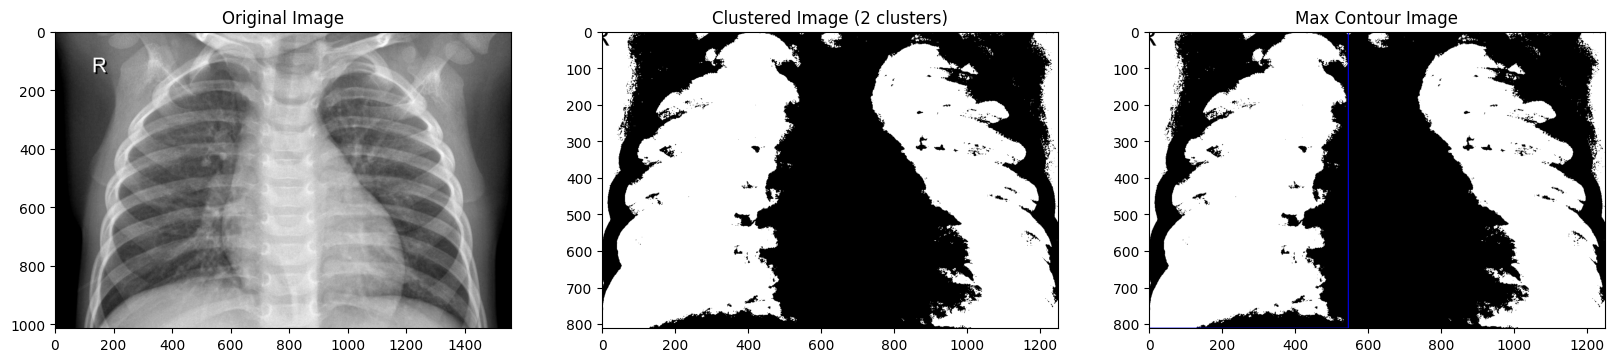

Center of the image: (452, 250)
Mean distance left side: 180.6702605186642
Mean distance right side: 383.6928174455373
Filtered distances less than left_mean_distance:
Euclidean distance from center for contour at (327,390): 121.01652779682617
Euclidean distance from center for contour at (331,388): 119.23086848631104
Euclidean distance from center for contour at (190,424): 160.11246047700348
Euclidean distance from center for contour at (266,334): 168.77203559831824
Euclidean distance from center for contour at (331,252): 162.64070831129578
Euclidean distance from center for contour at (342,204): 179.8054504179448
Filtered distances less than right_mean_distance:
Euclidean distance from center for contour at (596,467): 260.43233286210835
Euclidean distance from center for contour at (608,462): 263.21094202179364
Euclidean distance from center for contour at (613,462): 266.20480837129895
Euclidean distance from center for contour at (726,462): 346.4390278245221
Euclidean distance from 

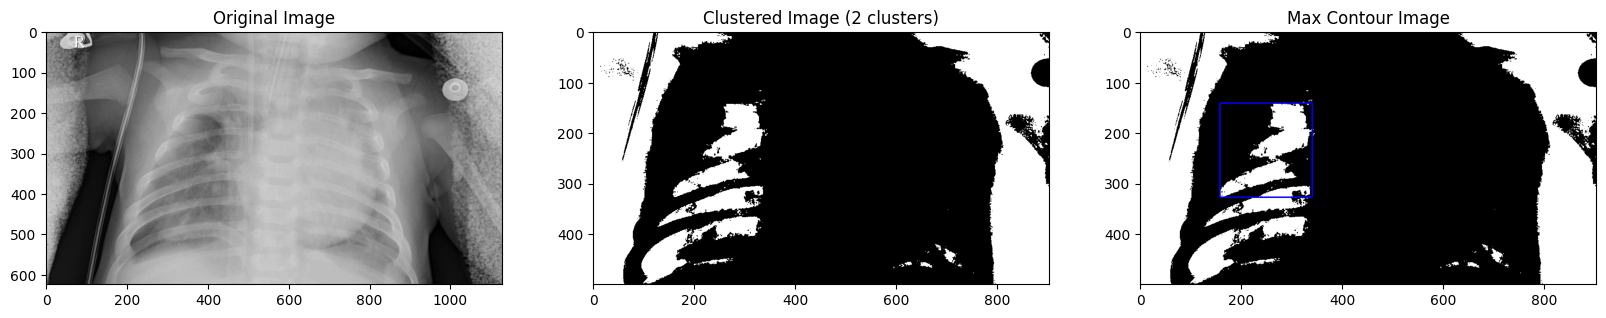

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def process(img):
    flat_img = img.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    labels = kmeans.fit_predict(flat_img)
    centers = kmeans.cluster_centers_
    if np.mean(centers[1]) > np.mean(centers[0]):
        labels = 1 - labels
    clustered = np.reshape(labels, img.shape)
    # Convert to binary image
    clustered_binary = np.uint8(clustered * 255)
    return clustered_binary

def draw_max_contour(clustered_img):
    bgr_img = cv2.cvtColor(clustered_img, cv2.COLOR_GRAY2BGR)
    result = bgr_img.copy()
    ret, thresh = cv2.threshold(clustered_img, 0, 255, cv2.THRESH_BINARY)
    if cv2.__version__[0] > '3':
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        _, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    middle_x = clustered_img.shape[1] // 2
    region_start = middle_x - clustered_img.shape[1] * 0.15
    region_end = middle_x + clustered_img.shape[1] * 0.15
    
    max_contour_area = 0
    max_contour = None
    
    center_x = clustered_img.shape[1] // 2
    center_y = clustered_img.shape[0] // 2
    
    print("Center of the image:", (center_x, center_y))
    
    left_distances = []
    left_centroids = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if region_start <= x <= region_end or region_start <= x + w <= region_end:
            contour_area = cv2.contourArea(contour)
            if contour_area > max_contour_area:
                max_contour_area = contour_area
                max_contour = contour
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                distance = np.sqrt((cX - center_x)**2 + (cY - center_y)**2)
                if cX < center_x:
                    left_distances.append(distance)
                    left_centroids.append((cX, cY))

    right_distances = []
    right_centroids = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            distance = np.sqrt((cX - center_x)**2 + (cY - center_y)**2)
            if cX >= center_x:
                right_distances.append(distance)
                right_centroids.append((cX, cY))
    
    left_mean_distance = np.mean(left_distances)
    right_mean_distance = np.mean(right_distances)
    
    print("Mean distance left side:", left_mean_distance)
    print("Mean distance right side:", right_mean_distance)
    
    '''print("Distances and centroids for contours on the left side:")
    for distance, centroid in zip(left_distances, left_centroids):
        print("Euclidean distance from center for contour at ({},{}): {}".format(centroid[0], centroid[1], distance))
    
    print("Distances and centroids for contours on the right side:")
    for distance, centroid in zip(right_distances, right_centroids):
        print("Euclidean distance from center for contour at ({},{}): {}".format(centroid[0], centroid[1], distance))
    '''
    left_filtered_distances = [distance for distance in left_distances if distance < left_mean_distance]
    right_filtered_distances = [distance for distance in right_distances if distance < right_mean_distance]

    print("Filtered distances less than left_mean_distance:")
    for distance, centroid in zip(left_filtered_distances, left_centroids):
        print("Euclidean distance from center for contour at ({},{}): {}".format(centroid[0], centroid[1], distance))

    print("Filtered distances less than right_mean_distance:")
    for distance, centroid in zip(right_filtered_distances, right_centroids):
        print("Euclidean distance from center for contour at ({},{}): {}".format(centroid[0], centroid[1], distance))
    
    if max_contour is not None:
        x, y, w, h = cv2.boundingRect(max_contour)
        thickness = 10
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    return result

def plot(original, clustered, max_contour_image):
    plt.figure(figsize=(20, 5))
    
    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('on')
    
    # Plot the clustered image
    plt.subplot(1, 3, 2)
    plt.imshow(clustered, cmap='gray')
    plt.title('Clustered Image (2 clusters)')
    plt.axis('on')
    
    # Plot the max contour image
    plt.subplot(1, 3, 3)
    plt.imshow(max_contour_image, cmap='gray')
    plt.title('Max Contour Image')
    plt.axis('on')
    
    plt.show()

image_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0085-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"
]

for image_path in image_paths:
    cropped_img, original_img = crop(image_path)  
    clustered_img = process(cropped_img)
    max_contour_image = draw_max_contour(clustered_img)
    plot(original_img, clustered_img, max_contour_image)

Center of the image: (624, 406)
Mean distance left side: 285.6023880652487
Mean distance right side: 498.08837195066707
Filtered distances less than left_mean_distance:
Euclidean distance from center for contour at (531,788): 203.08865059377396
Euclidean distance from center for contour at (521,786): 172.45579143653018
Euclidean distance from center for contour at (515,782): 115.13470371699404
Euclidean distance from center for contour at (493,785): 120.55289295574785
Euclidean distance from center for contour at (472,649): 142.9475428260311
Euclidean distance from center for contour at (475,544): 158.7765725792064
Euclidean distance from center for contour at (454,435): 173.6663467687393
Euclidean distance from center for contour at (514,372): 169.17742166140255
Euclidean distance from center for contour at (511,364): 171.1724276862369
Euclidean distance from center for contour at (489,359): 175.5733464965568
Filtered distances less than right_mean_distance:
Euclidean distance from ce

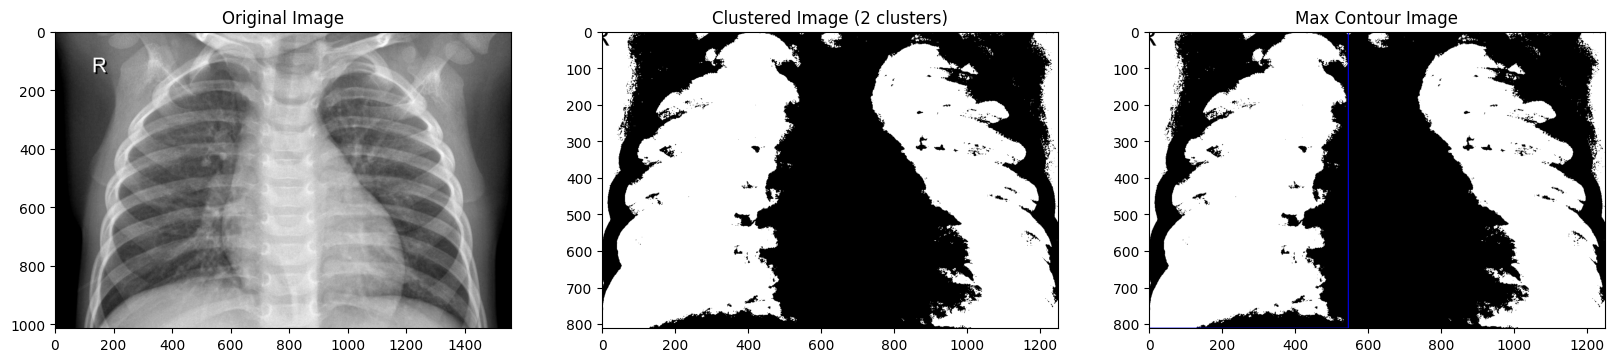

Center of the image: (452, 250)
Mean distance left side: 180.6702605186642
Mean distance right side: 383.6928174455373
Filtered distances less than left_mean_distance:
Euclidean distance from center for contour at (327,390): 121.01652779682617
Euclidean distance from center for contour at (331,388): 119.23086848631104
Euclidean distance from center for contour at (190,424): 160.11246047700348
Euclidean distance from center for contour at (266,334): 168.77203559831824
Euclidean distance from center for contour at (331,252): 162.64070831129578
Euclidean distance from center for contour at (342,204): 179.8054504179448
Filtered distances less than right_mean_distance:
Euclidean distance from center for contour at (596,467): 260.43233286210835
Euclidean distance from center for contour at (608,462): 263.21094202179364
Euclidean distance from center for contour at (613,462): 266.20480837129895
Euclidean distance from center for contour at (726,462): 346.4390278245221
Euclidean distance from 

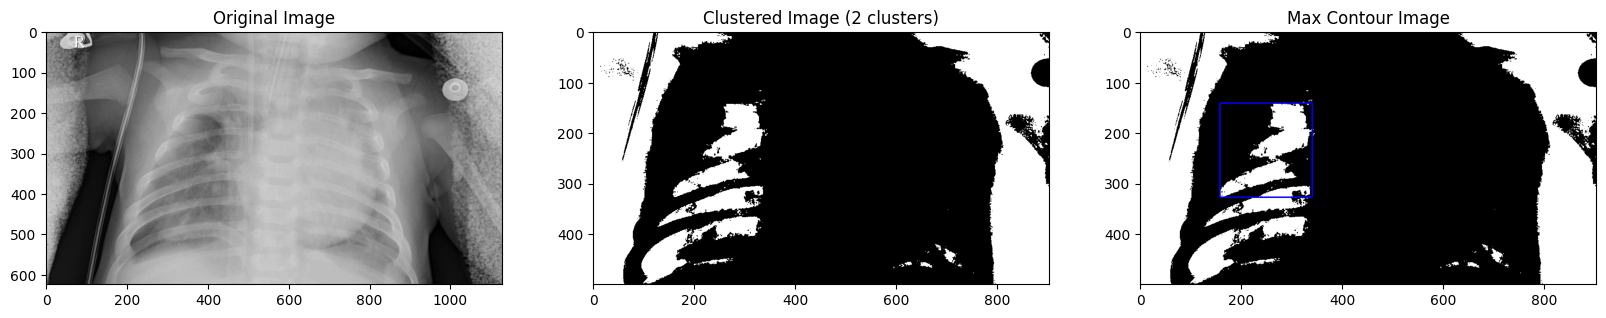

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def process(img):
    flat_img = img.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    labels = kmeans.fit_predict(flat_img)
    centers = kmeans.cluster_centers_
    if np.mean(centers[1]) > np.mean(centers[0]):
        labels = 1 - labels
    clustered = np.reshape(labels, img.shape)
    # Convert to binary image
    clustered_binary = np.uint8(clustered * 255)
    return clustered_binary

def draw_max_contour(clustered_img):
    bgr_img = cv2.cvtColor(clustered_img, cv2.COLOR_GRAY2BGR)
    result = bgr_img.copy()
    ret, thresh = cv2.threshold(clustered_img, 0, 255, cv2.THRESH_BINARY)
    if cv2.__version__[0] > '3':
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        _, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    middle_x = clustered_img.shape[1] // 2
    region_start = middle_x - clustered_img.shape[1] * 0.15
    region_end = middle_x + clustered_img.shape[1] * 0.15
    
    max_contour_area = 0
    max_contour = None
    
    center_x = clustered_img.shape[1] // 2
    center_y = clustered_img.shape[0] // 2
    
    print("Center of the image:", (center_x, center_y))
    
    left_distances = []
    left_centroids = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if region_start <= x <= region_end or region_start <= x + w <= region_end:
            contour_area = cv2.contourArea(contour)
            if contour_area > max_contour_area:
                max_contour_area = contour_area
                max_contour = contour
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                distance = np.sqrt((cX - center_x)**2 + (cY - center_y)**2)
                if cX < center_x:
                    left_distances.append(distance)
                    left_centroids.append((cX, cY))

    right_distances = []
    right_centroids = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            distance = np.sqrt((cX - center_x)**2 + (cY - center_y)**2)
            if cX >= center_x:
                right_distances.append(distance)
                right_centroids.append((cX, cY))
    
    left_mean_distance = np.mean(left_distances)
    right_mean_distance = np.mean(right_distances)
    
    print("Mean distance left side:", left_mean_distance)
    print("Mean distance right side:", right_mean_distance)
    
    left_filtered_distances = [distance for distance in left_distances if distance < left_mean_distance]
    right_filtered_distances = [distance for distance in right_distances if distance < right_mean_distance]

    print("Filtered distances less than left_mean_distance:")
    for distance, centroid in zip(left_filtered_distances, left_centroids):
        print("Euclidean distance from center for contour at ({},{}): {}".format(centroid[0], centroid[1], distance))

    print("Filtered distances less than right_mean_distance:")
    for distance, centroid in zip(right_filtered_distances, right_centroids):
        print("Euclidean distance from center for contour at ({},{}): {}".format(centroid[0], centroid[1], distance))
    
    if max_contour is not None:
        x, y, w, h = cv2.boundingRect(max_contour)
        thickness = 10
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    return result

def plot(original, clustered, max_contour_image):
    plt.figure(figsize=(20, 5))
    
    # Plot the original image
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('on')
    
    # Plot the clustered image
    plt.subplot(1, 3, 2)
    plt.imshow(clustered, cmap='gray')
    plt.title('Clustered Image (2 clusters)')
    plt.axis('on')
    
    # Plot the max contour image
    plt.subplot(1, 3, 3)
    plt.imshow(max_contour_image, cmap='gray')
    plt.title('Max Contour Image')
    plt.axis('on')
    
    plt.show()

image_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0085-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"
]

for image_path in image_paths:
    cropped_img, original_img = crop(image_path)  
    clustered_img = process(cropped_img)
    max_contour_image = draw_max_contour(clustered_img)
    plot(original_img, clustered_img, max_contour_image)
    
    

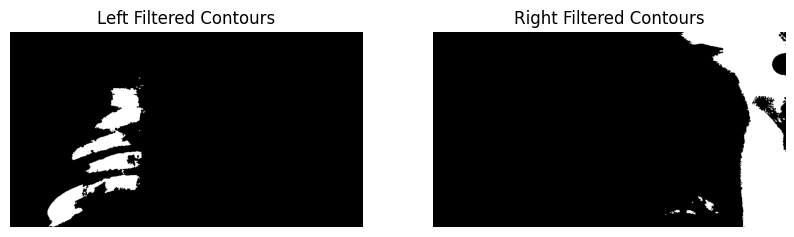

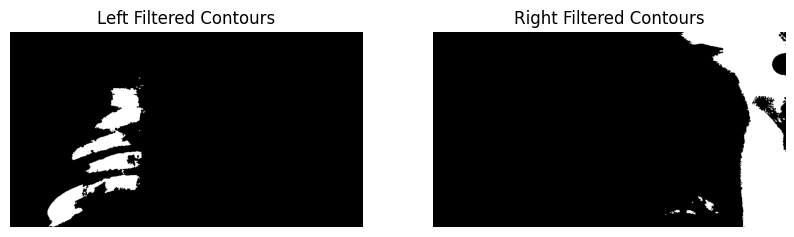

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#This margin is used to remove the corners with Labels {R, L}
def margin(image_path, margin_percent=10):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = img.shape
    margin_x = int(w * margin_percent / 100)
    margin_y = int(h * margin_percent / 100)
    cropped = img[margin_y:h-margin_y, margin_x:w-margin_x]
    return cropped, img

#KMeans_Clustering used in image segmentation to
#partition xray_images into regions based on pixel similarities
def k_means(img):
    flat_img = img.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
    labels = kmeans.fit_predict(flat_img)
    centers = kmeans.cluster_centers_
    if np.mean(centers[1]) > np.mean(centers[0]):
        labels = 1 - labels
    clustered = np.reshape(labels, img.shape)
    # Convert to binary image
    clustered_binary = np.uint8(clustered * 255)
    return clustered_binary

#Filtering based on Multiple Conditions
def draw_max_contour(clustered_img):
    bgr_img = cv2.cvtColor(clustered_img, cv2.COLOR_GRAY2BGR)
    result = bgr_img.copy()
    ret, thresh = cv2.threshold(clustered_img, 0, 255, cv2.THRESH_BINARY)
    if cv2.__version__[0] > '3':
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        _, contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    middle_x = clustered_img.shape[1] // 2
    region_start = middle_x - clustered_img.shape[1] * 0.15
    region_end = middle_x + clustered_img.shape[1] * 0.15
    
    max_contour_area = 0
    max_contour = None
    
    center_x = clustered_img.shape[1] // 2
    center_y = clustered_img.shape[0] // 2
    
    left_filtered_images = []  # Store filtered left contours
    right_filtered_images = []  # Store filtered right contours
    
    left_distances = []
    left_centroids = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if region_start <= x <= region_end or region_start <= x + w <= region_end:
            contour_area = cv2.contourArea(contour)
            if contour_area > max_contour_area:
                max_contour_area = contour_area
                max_contour = contour
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                distance = np.sqrt((cX - center_x)**2 + (cY - center_y)**2)
                if cX < center_x:
                    left_distances.append(distance)
                    left_centroids.append((cX, cY))
                    left_filtered_images.append(contour)  

    right_distances = []
    right_centroids = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            distance = np.sqrt((cX - center_x)**2 + (cY - center_y)**2)
            if cX >= center_x:
                right_distances.append(distance)
                right_centroids.append((cX, cY))
                right_filtered_images.append(contour)  # Store right filtered contour
    
    return left_filtered_images, right_filtered_images

#setting image paths
image_paths = [
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0085-0001.jpeg",
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"
]

for image_path in image_paths:
    margin_img, _ = margin(image_path)  
    clustered_img = k_means(cropped_img)
    left_filtered_contours, right_filtered_contours = draw_max_contour(clustered_img)
    
    left_contour_img = np.zeros_like(cropped_img)
    right_contour_img = np.zeros_like(cropped_img)
    
    for contour in left_filtered_contours:
        cv2.drawContours(left_contour_img, [contour], -1, 255, thickness=cv2.FILLED)
    
    for contour in right_filtered_contours:
        cv2.drawContours(right_contour_img, [contour], -1, 255, thickness=cv2.FILLED)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(left_contour_img, cmap='gray')
    plt.title('Left Filtered Contours')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(right_contour_img, cmap='gray')
    plt.title('Right Filtered Contours')
    plt.axis('off')
    
    plt.show()